In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


import warnings
warnings.filterwarnings("ignore")

In [2]:
housing = pd.read_csv("USA_Housing.csv")
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
for i in housing.columns:
    print("********************************",i,"**********************")
    print()
    print(set(housing[i].tolist()))
    print()

******************************** Avg. Area Income **********************

{65543.33854, 65550.80328, 65554.84252, 65561.45584, 65566.35691, 65567.85918, 65573.46111, 65579.37802, 65580.05597, 65594.06739, 65606.35861, 65608.60771, 65614.78487, 65627.05111, 65629.88097, 65632.92598, 65641.80717, 65643.86248, 65659.58698, 65669.98453, 65672.20442, 65673.75136, 65674.59699, 65687.10668, 65692.6182, 65694.05127, 65697.82067, 98468.25364, 65706.75564, 65718.30197, 65729.22233, 65736.34642, 65739.68602, 65741.39764, 65745.73181, 65801.23308, 65803.60065, 65817.20028, 65825.82895, 65827.33514, 65827.67224, 65837.11694, 65841.30879, 65846.40694, 65846.17104, 65851.26289, 65855.86324, 65864.97112, 65866.45257, 65873.93941, 65885.13576, 65893.44773, 65896.42207, 65897.66157, 65901.47709, 65901.03035, 65903.25066, 65904.80993, 65907.94668, 65908.73975, 65913.86161, 65925.8538, 65935.61261, 65935.57561, 65939.88495, 65948.91814, 65950.34702, 65959.78116, 65966.01721, 65967.76931, 65969.70704, 6597

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
housing.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

# Handling missing data

In [6]:
# 1. Handling missing values in Avg. Area Income
housing['Avg. Area Income']= housing['Avg. Area Income'].fillna(housing['Avg. Area Income'].median())

In [7]:
# 2. handling missing values in Avg. Area Number of Rooms
housing['Avg. Area Number of Rooms']= housing['Avg. Area Number of Rooms'].fillna(housing['Avg. Area Number of Rooms'].median())

In [8]:
# 3. handling missing values in Avg. Area Number of Bedrooms
housing['Avg. Area Number of Bedrooms']= housing['Avg. Area Number of Bedrooms'].fillna(housing['Avg. Area Number of Bedrooms'].median())


In [9]:
housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Handling char

In [10]:
# address is not necessary for evaluation in the dataset so we drop address
housing = housing.iloc[:,0:-1]
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# Handling Outlier

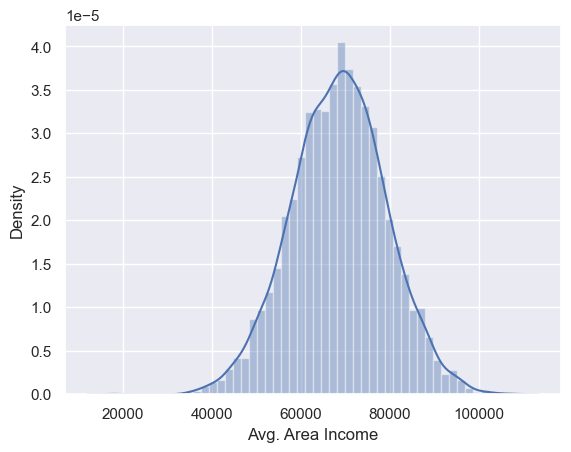

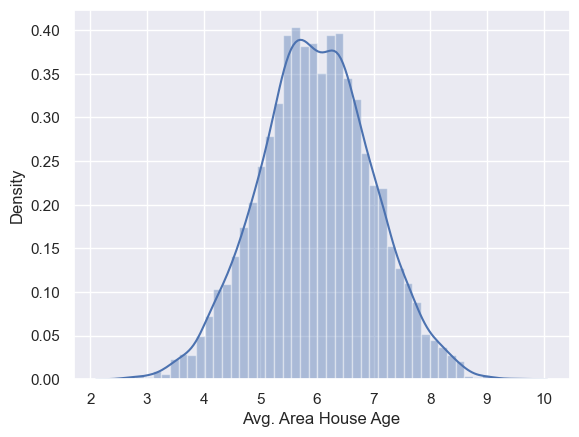

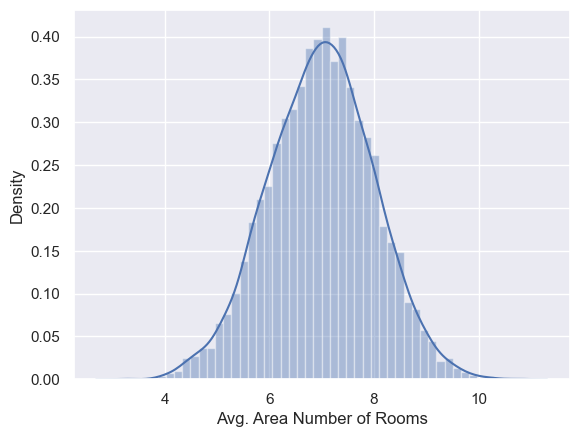

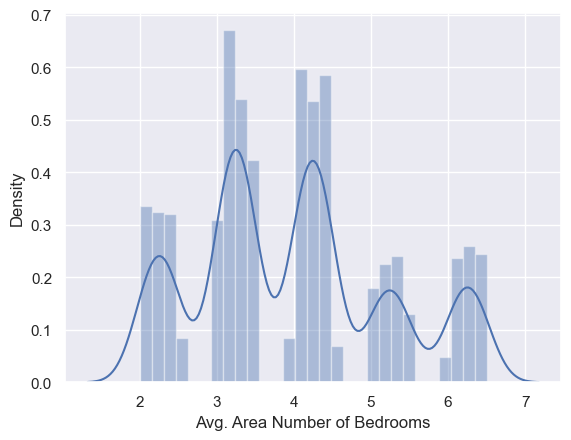

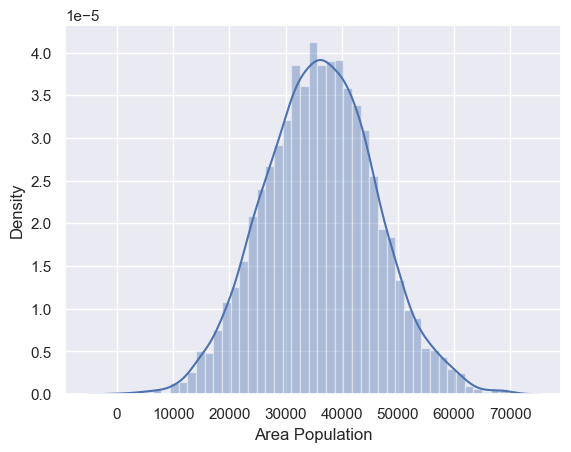

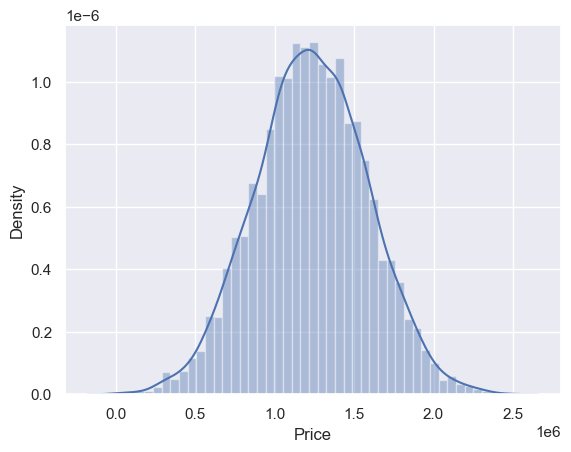

In [11]:
def distplot(col):
    sns.distplot(housing[col])
    plt.show()
for i in list(housing.columns)[0:]:
    distplot(i)

In [12]:
# outlier handing in each column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [13]:
# 1. Avg. Area Income
Q1 = housing['Avg. Area Income'].quantile(0.25)
Q3 = housing['Avg. Area Income'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1 - 1.5*IQR
print("Q1: ", Q1)
print("Q3: ",Q3)
print("IQR: ",IQR)
print("upper limit: ", upper_limit)
print("lower limit: ",lower_limit)

Q1:  61485.1501925
Q3:  75766.51910250001
IQR:  14281.368910000012
upper limit:  97188.57246750002
lower limit:  40063.096827499976


In [14]:
housing['Avg. Area Income'] = np.where(housing['Avg. Area Income']>upper_limit,upper_limit,
                                      np.where(housing['Avg. Area Income']<lower_limit,lower_limit
                                              ,housing['Avg. Area Income']))

In [15]:
# 2. Avg. Area House Age
Q1 = housing['Avg. Area House Age'].quantile(0.25)
Q3 = housing['Avg. Area House Age'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1 - 1.5*IQR
print("Q1: ", Q1)
print("Q3: ",Q3)
print("IQR: ",IQR)
print("upper limit: ", upper_limit)
print("lower limit: ",lower_limit)

Q1:  5.32228301575
Q3:  6.65080847925
IQR:  1.3285254635000001
upper limit:  8.6435966745
lower limit:  3.3294948205


In [16]:
housing['Avg. Area House Age'] = np.where(housing['Avg. Area House Age']>upper_limit,upper_limit,
                                      np.where(housing['Avg. Area House Age']<lower_limit,lower_limit
                                              ,housing['Avg. Area House Age']))

<AxesSubplot: >

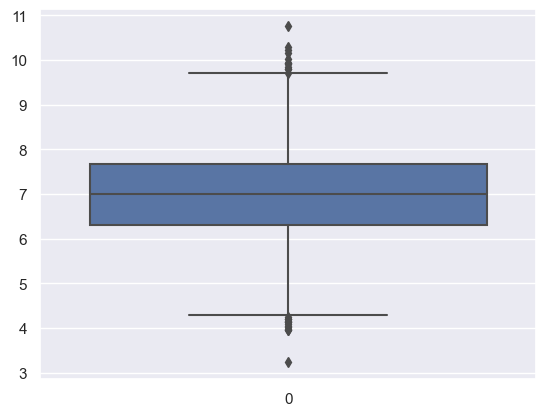

In [17]:
# 3. Avg. Area Number of Rooms
sns.boxplot(housing['Avg. Area Number of Rooms'])

In [18]:
Q1 = housing['Avg. Area Number of Rooms'].quantile(0.25)
Q3 = housing['Avg. Area Number of Rooms'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1 - 1.5*IQR
print("Q1: ", Q1)
print("Q3: ",Q3)
print("IQR: ",IQR)
print("upper limit: ", upper_limit)
print("lower limit: ",lower_limit)

Q1:  6.29969161825
Q3:  7.6652805545
IQR:  1.36558893625
upper limit:  9.713663958875
lower limit:  4.251308213874999


In [19]:
housing['Avg. Area Number of Rooms'] = np.where(housing['Avg. Area Number of Rooms']>upper_limit,upper_limit,
                                      np.where(housing['Avg. Area Number of Rooms']<lower_limit,lower_limit
                                              ,housing['Avg. Area Number of Rooms']))

In [20]:
# 4. Area Population
Q1 = housing['Area Population'].quantile(0.25)
Q3 = housing['Area Population'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1 - 1.5*IQR
print("Q1: ", Q1)
print("Q3: ",Q3)
print("IQR: ",IQR)
print("upper limit: ", upper_limit)
print("lower limit: ",lower_limit)

Q1:  29403.9287
Q3:  42861.29077
IQR:  13457.36207
upper limit:  63047.333875
lower limit:  9217.885595000003


In [21]:
housing['Area Population'] = np.where(housing['Area Population']>upper_limit,upper_limit,
                                      np.where(housing['Area Population']<lower_limit,lower_limit
                                              ,housing['Area Population']))

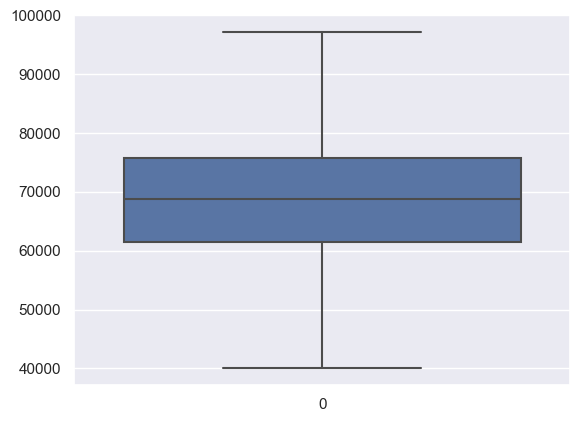

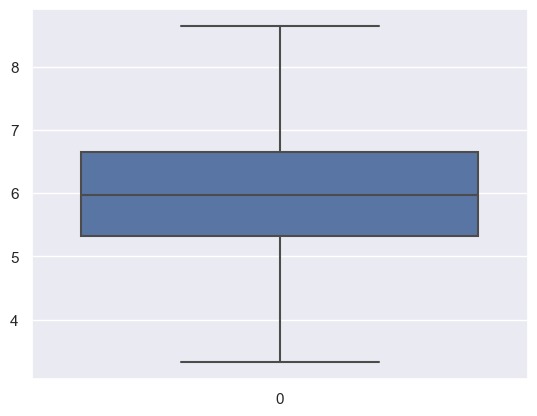

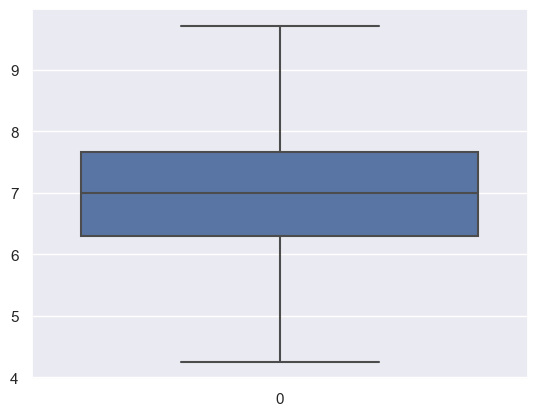

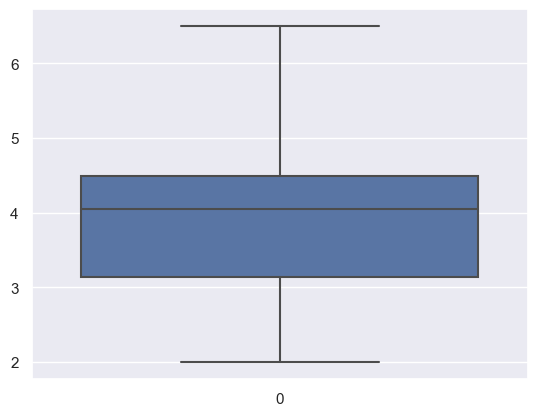

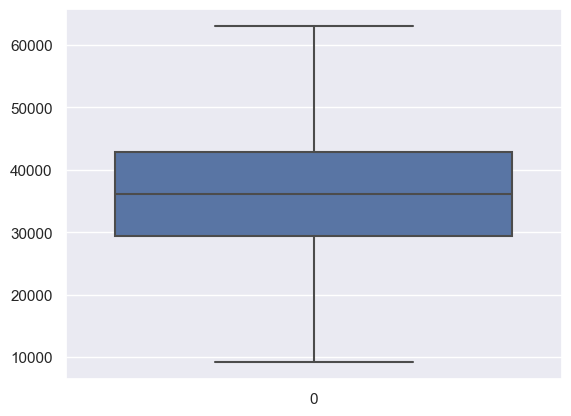

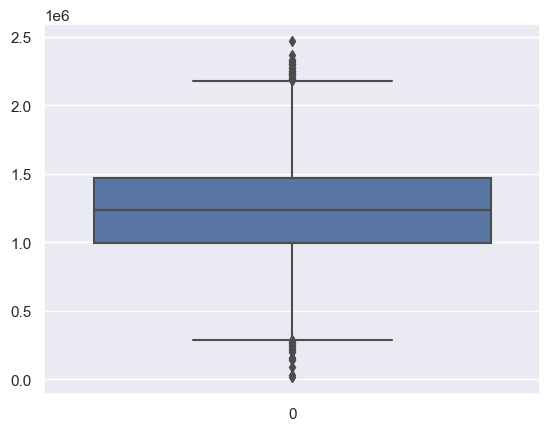

In [22]:
def boxplot(col):
    sns.boxplot(housing[col])
    plt.show()
for i in list(housing.columns)[0:]:
    boxplot(i)

# Feature Scaling

In [23]:
x = housing.iloc[:,0:-1]
y = housing.iloc[:,-1]

In [24]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [25]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087582,-1.325622
1,1.008309,0.025747,-0.256381,-0.723031,0.407049
2,-0.690457,-0.113082,1.523179,0.930619,0.073326
3,-0.495800,1.226822,-1.398967,-0.585227,-0.187484
4,-0.813869,-0.949376,0.850726,0.201068,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423104,-1.350917
4996,0.936679,1.035210,-0.410236,0.030839,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501219,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181909,0.655755


In [27]:
pd.DataFrame(sc_x).describe()

,0,1,2,3,4
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-4.160228e-16,-1.573852e-16,-2.913225e-16,1.364242e-16,3.439027e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.697774e+00,-2.683155e+00,-2.732629e+00,-1.606598e+00,-2.732030e+00
25%,-6.717228e-01,-6.639070e-01,-6.869427e-01,-6.825001e-01,-6.850199e-01
50%,1.987953e-02,-7.155075e-03,1.537949e-02,5.515732e-02,4.090352e-03
75%,6.789778e-01,6.822584e-01,6.768483e-01,4.118268e-01,6.796532e-01
max,2.705029e+00,2.701506e+00,2.722535e+00,2.041158e+00,2.726663e+00


# VIF(variation_inflation_factor)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()
vif['variance_inflation_factor'] =[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Fatures'] = x.columns

In [29]:
vif

,variance_inflation_factor,Fatures
0,1.001067,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274864,Avg. Area Number of Rooms
3,1.275727,Avg. Area Number of Bedrooms
4,1.001144,Area Population


# finding correlation

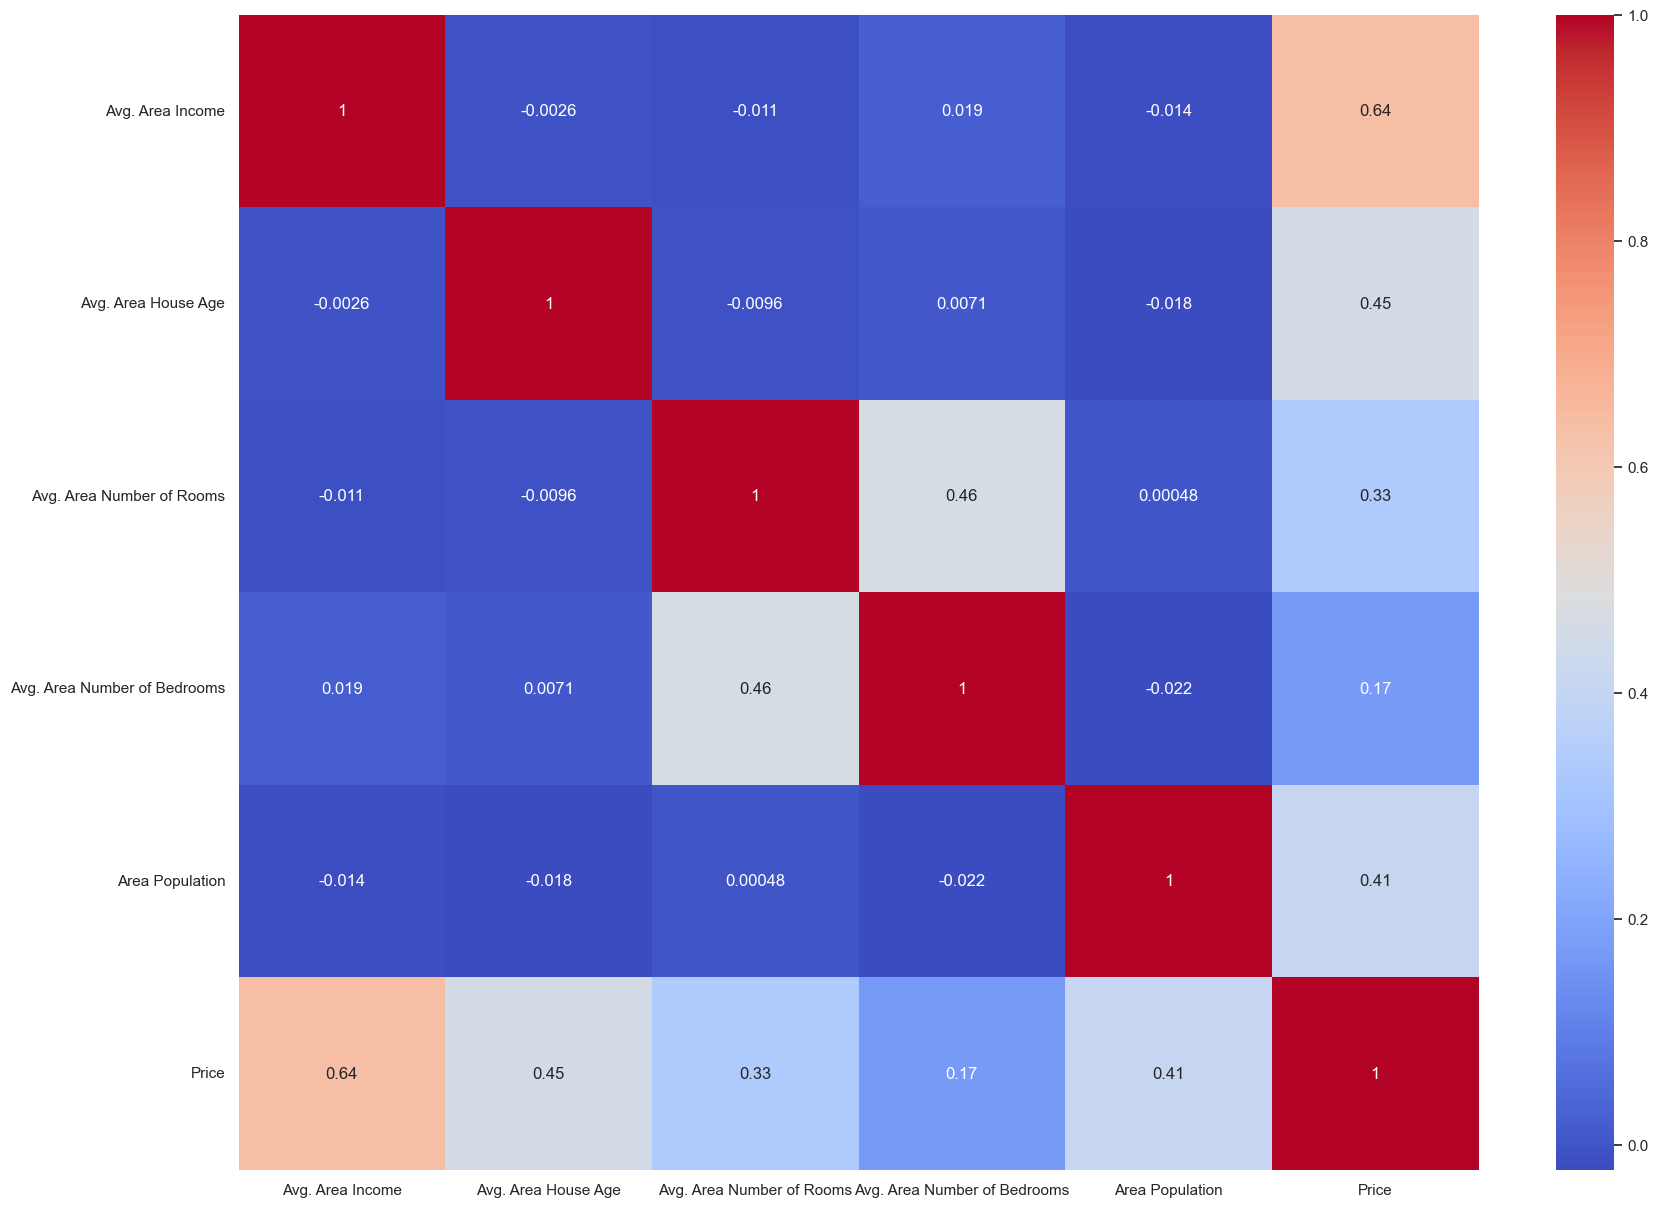

In [30]:
plt.figure(figsize=(20,15))
corr = housing.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [31]:
# spliting data imto train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [32]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4000, 5) (1000, 5) (4000,) (1000,)


# Building model - Linear regression

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [34]:
print(lm.coef_)

[2.17613894e+01 1.67097472e+05 1.20852133e+05 1.89561778e+03
 1.53789529e+01]


In [35]:
print(lm.intercept_)

-2666908.7041735724


In [36]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [37]:
# Total price
# predict test dataset with linear model
y_pred = lm.predict(x_test)
y_pred

array([ 970015.20691168,  953873.54089578,  905675.74467137,
        489776.93992946,  715023.74698129, 1048528.11780765,
        711736.18679602,  785251.25542176, 1805979.9859265 ,
       1540329.49273159,  740742.60662759, 1145491.47923181,
       2126674.26082884,  972814.98457831, 1152165.77717185,
        873145.19025843, 1103623.60390984,  799272.90382828,
       1205195.35248518, 1409401.7470877 , 1139011.63012213,
       1062167.7416016 , 1437155.98816797, 1177067.83788482,
       1298314.05505081, 1119719.56378698, 1117308.81615577,
       1374272.8348772 , 1590812.75128912, 1193510.6139951 ,
       1565845.05257403, 2011030.4894302 ,  891528.39578936,
       1326902.35908688, 1184301.99349294,  746960.09089331,
       1082458.4491093 , 1581557.00114142, 1260958.35629358,
       1334969.03345232, 1599635.49484177,  959545.86018477,
       1220329.41891919, 1115413.6609418 , 1033085.47608856,
       1705508.2383842 , 1016885.22909294, 1620422.12380562,
       1153282.1193102 ,

In [38]:
# evaluation
from sklearn.metrics import r2_score
print("Accuracy: ",r2_score(y_test,y_pred))

Accuracy:  0.9090578756842159


# Approach 2: - OLS method

In [39]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [40]:
regmodel = smf.OLS(endog = y_train,exog = x_train).fit()

In [41]:
regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.145e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        22:16:59   Log-Likelihood:                         -55277.
No. Observations:                4000   AIC:                                  1.106e+05
Df Residuals:                    3995   BIC:                                  1.106e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2876      0.303     33.993      0.000       9.694      10.881
Avg. Area House Age           5.244e+04   3319.852     15.796      0.000    4.59e+04     5.9e+04
Avg. Area Number of Rooms    -1.128e+04   3645.145     -3.096      0.002   -1.84e+04   -4137.194
Avg. Area Number of Bedrooms  4703.2720   3527.941      1.333      0.183   -2213.461    1.16e+04
Area Population                  8.0587      0.370     21.792      0.000       7.334       8.784
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.167
Skew:                          -0.013   Prob(JB):                        0.920
Kurtosis:                       3.018   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# as Avg. Area Number of Bedrooms is non-significant for dataset we drop 
x = x.drop(['Avg. Area Number of Bedrooms'], axis=1)

In [43]:
# spliting data imto train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [44]:
regmodel = smf.OLS(endog = y_train,exog = x_train).fit()

In [45]:
regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.680e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        22:16:59   Log-Likelihood:                         -55278.
No. Observations:                4000   AIC:                                  1.106e+05
Df Residuals:                    3996   BIC:                                  1.106e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Avg. Area Income             10.3008      0.303     34.052      0.000       9.708      10.894
Avg. Area House Age        5.246e+04   3320.148     15.800      0.000     4.6e+04     5.9e+04
Avg. Area Number of Rooms -8666.5831   3071.658     -2.821      0.005   -1.47e+04   -2644.419
Area Population               8.0411      0.370     21.756      0.000       7.316       8.766
==============================================================================
Omnibus:                        0.177   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.161
Skew:                          -0.015   Prob(JB):                        0.922
Kurtosis:                       3.008   Cond. No.                     7.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Accuracy : Adj. R-squared (uncentered):	0.964
- p-value - all variable are statically significant (p<=0.05)
### Assumption checks: -
 1) Multicollinearity - Not found - satisfied
 2) Endogenity - selected right dependent variable - satisfied
 3) Hetroscedasticity - already handled outlier (hence, data is homoscadasticity)
 4) Autocorrelation - Durbin-Watson:	1.979 (p-value <=0.05) - satisfied (no autocorrelation found)
 5) Check Linearity - satisfied
 6) Normality of Residual - satisfied



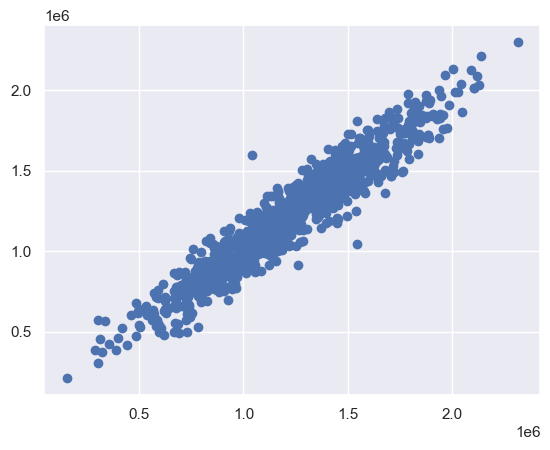

In [46]:
plt.scatter(y_test,y_pred)
plt.show()

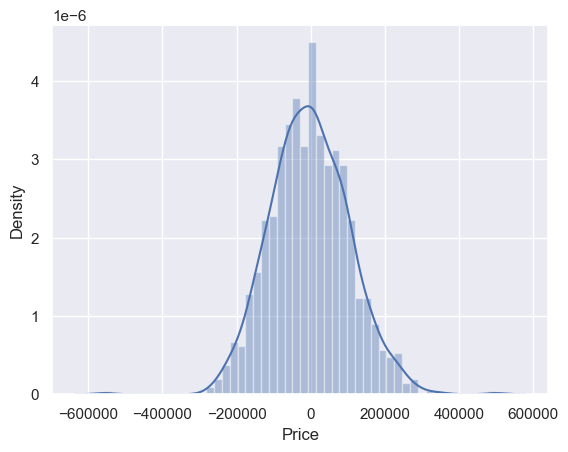

In [47]:
sns.distplot((y_test-y_pred),bins= 50)
plt.show()